# Assignment 4

Religious traditions in Oakland County, Michigan, USA. 

In [8]:
%matplotlib notebook
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib import rcParams

Data can be downloaded from:

https://thearda.com/us-religion/census/congregational-membership?y=2010&t=0&c=26125 (Oakland County, Michigan, USA)

https://thearda.com/us-religion/census/congregational-membership?t=4&y=2010 (USA)

In [9]:
# Oakland Michigan Data
OaklandMI_2010_df = pd.read_csv('data/US_Religion_Census_Oakland_County_Michigan_2010.csv').rename(lambda x: x.strip(),axis=1).dropna()[:-1]
OaklandMI_2010_df['Adherents'] = OaklandMI_2010_df['Adherents'].str.replace(',','',regex=False).astype(int)
OaklandMI_2010_df['Congregations'] = OaklandMI_2010_df['Congregations'].astype(int)
OaklandMI_2010_df['Religious Bodies'] = OaklandMI_2010_df['Religious Bodies'].str.replace('.','',regex=False)
OaklandMI_top10_2010_df = OaklandMI_2010_df.groupby('Tradition').agg({'Adherents': np.sum, 'Congregations' : np.sum}).reset_index()
OaklandMI_top10_2010_df = OaklandMI_top10_2010_df.sort_values('Tradition',ascending=True).reset_index().drop('index',axis=1)
OaklandMI_top10_2010_df['Adherents % of Total Adherents'] = OaklandMI_top10_2010_df['Adherents']/OaklandMI_top10_2010_df['Adherents'].sum()
OaklandMI_top10_2010_df['Adherents % of Pop'] = OaklandMI_top10_2010_df['Adherents']/1202362
OaklandMI_top10_2010_df

,Tradition,Adherents,Congregations,Adherents % of Total Adherents,Adherents % of Pop
0,Black Protestant,16826,28,0.027694,0.013994
1,Buddhism,4648,8,0.007650,0.003866
2,Catholic,289116,64,0.475852,0.240457
3,Evangelical Protestant,155826,291,0.256472,0.129600
4,Hinduism,1733,11,0.002852,0.001441
5,Islam,9378,6,0.015435,0.007800
6,Judaism,36167,30,0.059527,0.030080
7,Mainline Protestant,73373,158,0.120764,0.061024
8,Orthodox,13844,20,0.022786,0.011514
9,Other,6664,26,0.010968,0.005542


In [10]:
# USA Data
USA_2010_df = pd.read_csv('data/US_Religion_Census_USA_2010.csv').rename(lambda x: x.strip(),axis=1).dropna()[:-1]
USA_2010_df['Adherents'] = USA_2010_df['Adherents'].str.replace(',','',regex=False).astype(int)
USA_2010_df['Congregations'] = USA_2010_df['Congregations'].str.replace(',','',regex=False).astype(int)
USA_2010_df['Religious Bodies'] = USA_2010_df['Religious Bodies'].str.replace('.','',regex=False)
USA_top10_2010_df = USA_2010_df.groupby('Tradition').agg({'Adherents': np.sum, 'Congregations' : np.sum}).reset_index()
USA_top10_2010_df = USA_top10_2010_df.sort_values('Tradition',ascending=True).reset_index().drop('index',axis=1)
USA_top10_2010_df['Adherents % of Total Adherents'] = USA_top10_2010_df['Adherents']/USA_top10_2010_df['Adherents'].sum()
USA_top10_2010_df['Adherents % of Pop'] = USA_top10_2010_df['Adherents']/308745538.0
USA_top10_2010_df

,Tradition,Adherents,Congregations,Adherents % of Total Adherents,Adherents % of Pop
0,Black Protestant,4877067,16125,0.032385,0.015796
1,Buddhism,991683,2854,0.006585,0.003212
2,Catholic,58934906,20599,0.391342,0.190885
3,Evangelical Protestant,50013107,176126,0.332099,0.161988
4,Hinduism,641186,1625,0.004258,0.002077
5,Islam,2600082,2106,0.017265,0.008421
6,Judaism,2256584,3464,0.014984,0.007309
7,Mainline Protestant,22568258,77158,0.149859,0.073097
8,Orthodox,1056535,2493,0.007016,0.003422
9,Other,6657384,16578,0.044207,0.021563


<IPython.core.display.Javascript object>


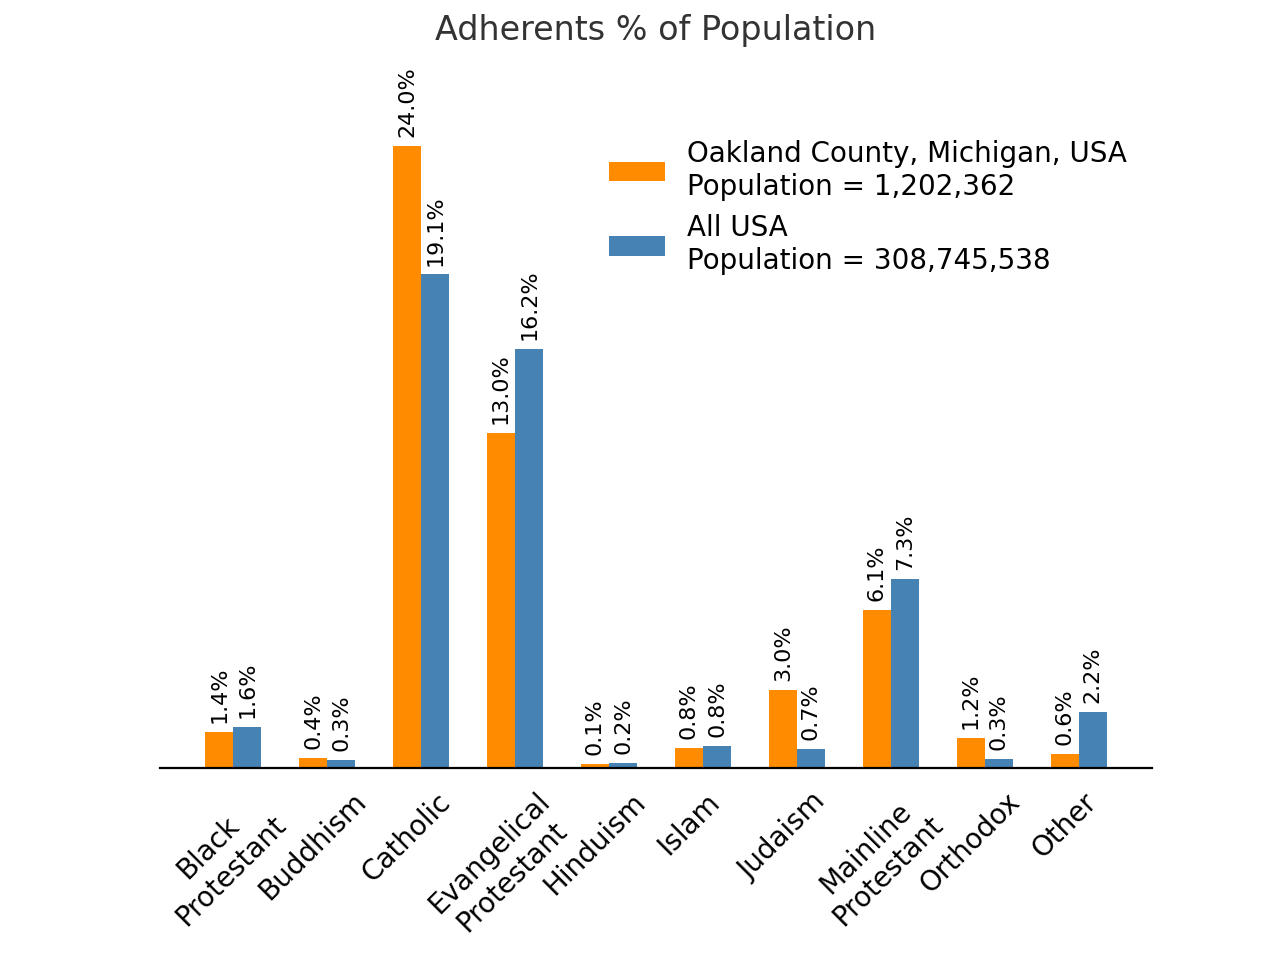

In [11]:
# Plots
# Adherents % of Total Population
plt.figure()

traditions = OaklandMI_top10_2010_df['Tradition'].str.replace(' ','\n',regex=False)
pos = np.arange(len(traditions))
OaklandMIadherents = OaklandMI_top10_2010_df['Adherents % of Pop'].to_list()
USAadherents = USA_top10_2010_df['Adherents % of Pop'].to_list()



bars_MI = plt.bar(pos, OaklandMIadherents, width=0.3, color='darkorange')

new_xvals = []

for item in pos:
    new_xvals.append(item+0.3)

bars_USA = plt.bar(new_xvals,USAadherents, width = 0.3 ,color='steelblue')

plt.title('Adherents % of Population',alpha=0.8, pad=27)
plt.xticks(pos, traditions,rotation=45)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)


plt.gca().spines.right.set_visible(False)
plt.gca().spines.left.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.subplots_adjust(bottom=0.2)

for bar in bars_MI:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.005, str(round(100*height,1)) + '%', 
                 ha='center', color='black', fontsize=8,rotation=90)
    
for bar in bars_USA:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.005, str(round(100*height,1)) + '%', 
                 ha='center', color='black', fontsize=8,rotation=90)
    
plt.legend(['Oakland County, Michigan, USA\nPopulation = 1,202,362', 'All USA\nPopulation = 308,745,538'],frameon=False)

plt.show()

plt.savefig('plot1.pdf')  

<IPython.core.display.Javascript object>


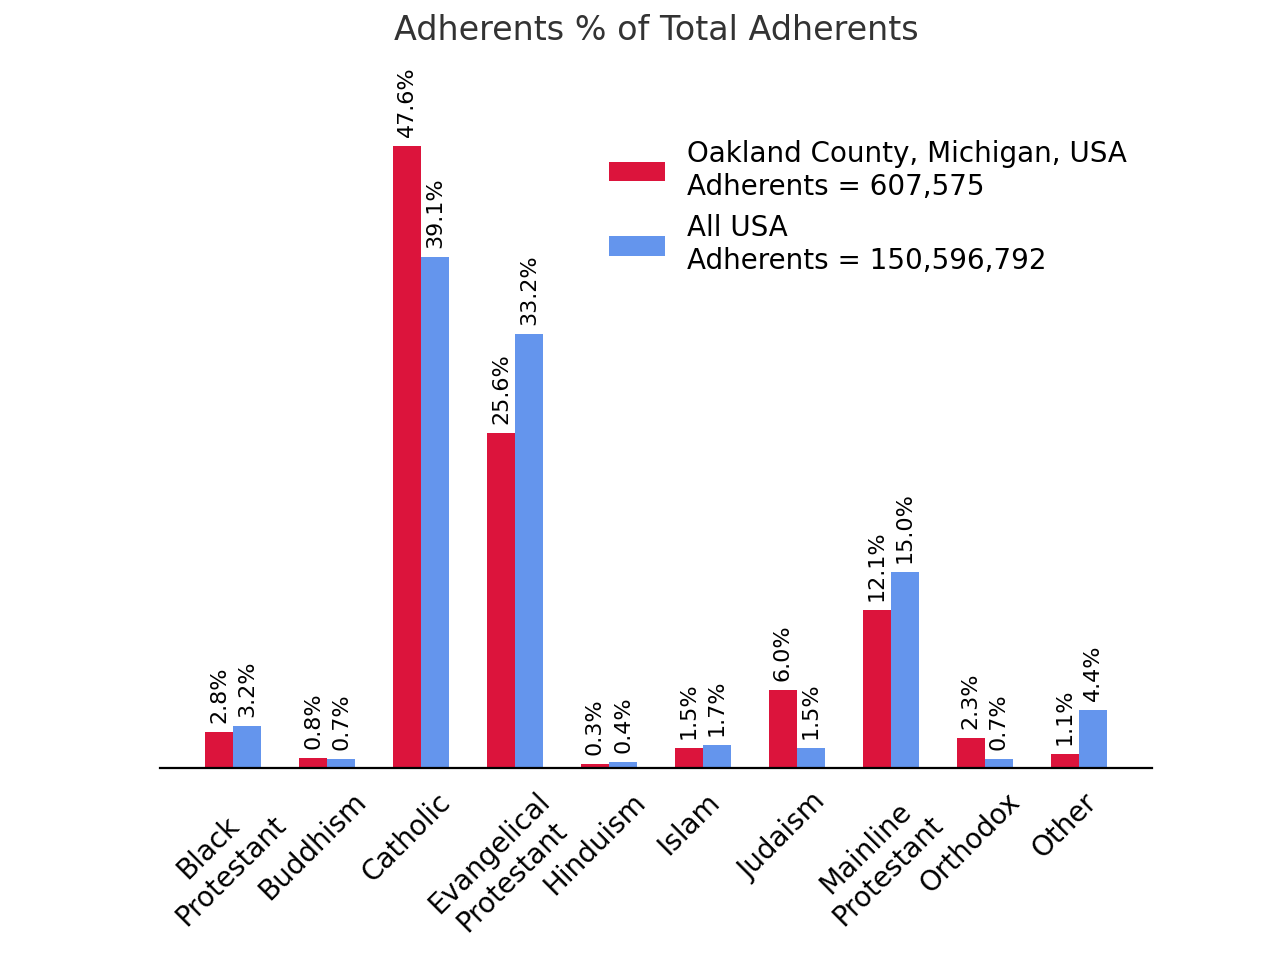

In [12]:
# Adherents % of Total Adherents
plt.figure()

traditions = OaklandMI_top10_2010_df['Tradition'].str.replace(' ','\n',regex=False)
pos = np.arange(len(traditions))
OaklandMIadherents = OaklandMI_top10_2010_df['Adherents % of Total Adherents'].to_list()
USAadherents = USA_top10_2010_df['Adherents % of Total Adherents'].to_list()



bars_MI = plt.bar(pos, OaklandMIadherents, width=0.3, color='crimson')

new_xvals = []

for item in pos:
    new_xvals.append(item+0.3)

bars_USA = plt.bar(new_xvals,USAadherents, width = 0.3 ,color='cornflowerblue')

plt.title('Adherents % of Total Adherents',alpha=0.8, pad=27)
plt.xticks(pos, traditions,rotation=45)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)


plt.gca().spines.right.set_visible(False)
plt.gca().spines.left.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.subplots_adjust(bottom=0.2)

for bar in bars_MI:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, str(round(100*height,1)) + '%', 
                 ha='center', color='black', fontsize=8,rotation=90)
    
for bar in bars_USA:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, str(round(100*height,1)) + '%', 
                 ha='center', color='black', fontsize=8,rotation=90)
    
plt.legend(['Oakland County, Michigan, USA\nAdherents = 607,575', 'All USA\nAdherents = 150,596,792'],frameon=False)

plt.show()

plt.savefig('plot2.pdf')  